In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft, ifft, fftfreq
from scipy.signal import butter, unit_impulse, lfilter, filtfilt, freqz
from numpy import sqrt, sin, cos, mean, pi

In [73]:
# 1
# TIME VECTOR AND INPUT TIME SERIES FUNCTION

t = np.arange(128)
delta = unit_impulse(128, 0)

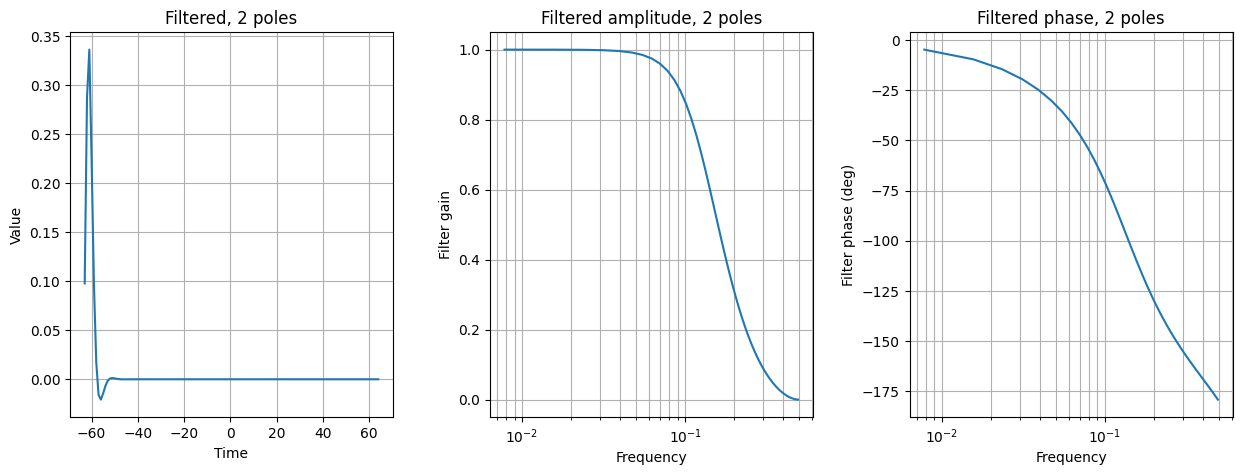

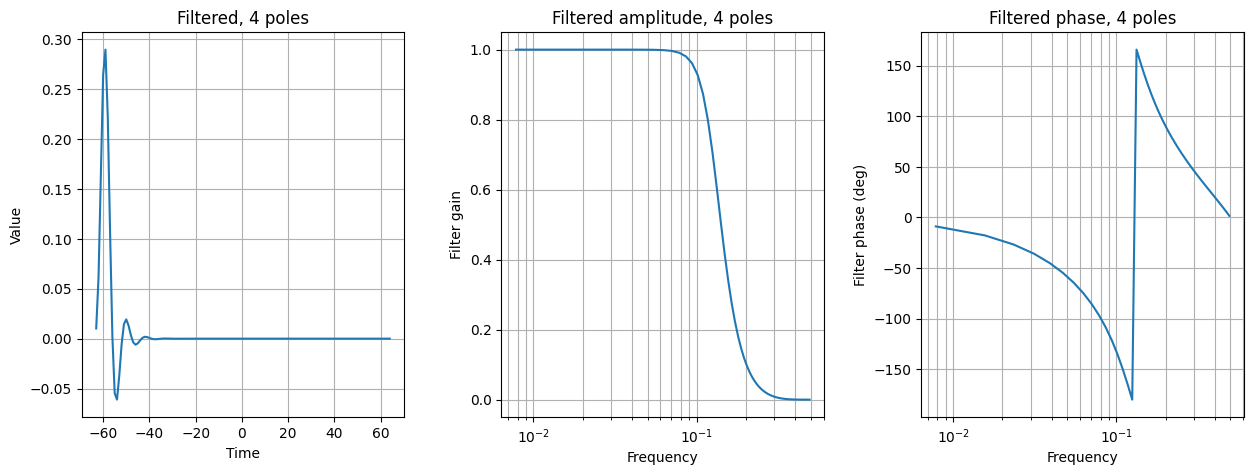

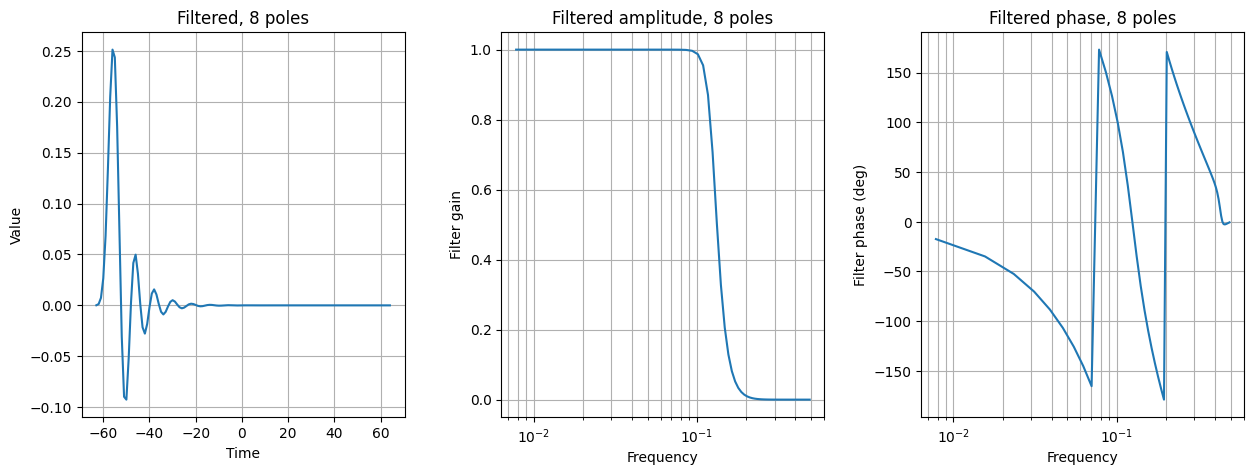

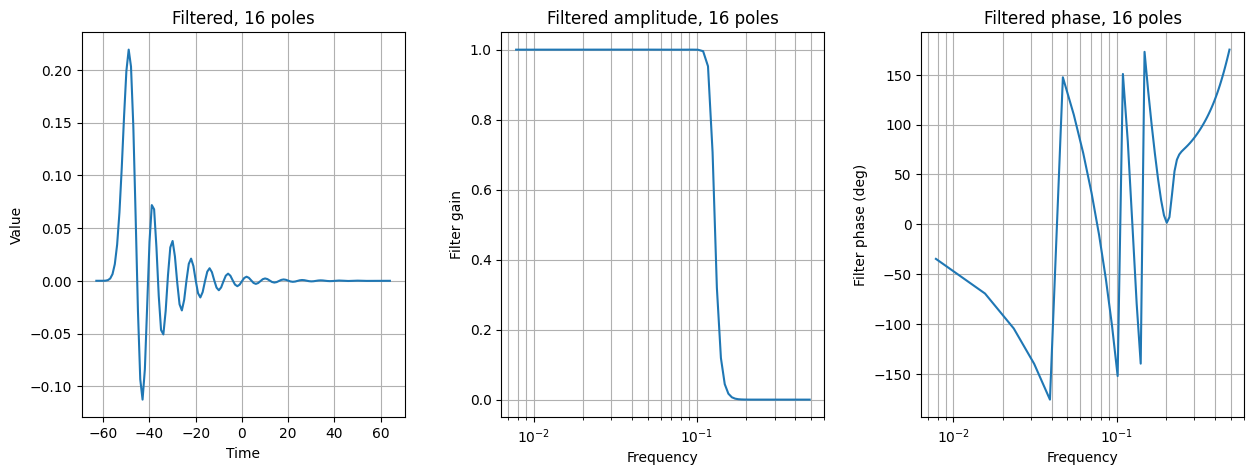

In [183]:
# (a), (b), and (c)

fnyquist = 1 / 2
fc = 0.5 * fnyquist
poles = np.array([2, 4, 8, 16])
butters = np.zeros(4, np.ndarray)

i = 0
for n_poles in poles:
    butters[i] = butter(poles[i], fc, 'lowpass', analog=False)
    i += 1

i = 0
for butterworth in butters:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    a = butterworth[0]
    b = butterworth[1]
    filtered = lfilter(a, b, delta)
    ax1.plot(t, filtered)
    ax1.set_title(f"Filtered, {poles[i]} poles")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Value")
    ax1.grid(True)

    fft_butter = fft(filtered)
    f = fftfreq(128, 1)
    j = np.where(f > 0)
    ax2.semilogx(f[j], abs(fft_butter)[j])
    ax2.grid(which='both')
    ax2.set_title(f"Filtered amplitude, {poles[i]} poles")
    ax2.set_xlabel("Frequency")
    ax2.set_ylabel("Filter gain")
    
    ax3.semilogx(f[j], np.angle(fft_butter)[j] * (180/pi))
    ax3.grid(which='both')
    ax3.set_title(f"Filtered phase, {poles[i]} poles")
    ax3.set_xlabel("Frequency")
    ax3.set_ylabel("Filter phase (deg)")
    i += 1
    
    plt.subplots_adjust(wspace=0.3)


### COMMENT:

As the number of poles increased, the filtered response became less localized in time and developed side lobes. With more poles, the primary spike at t=0 became smaller and the side lobes lasted longer and higher magnitudes. With more poles, the drop at the corner frequency became sharper in the amplitude plot. The phase response cycled between low (~ -150) and high (~ 150) more times as the number of poles increased.

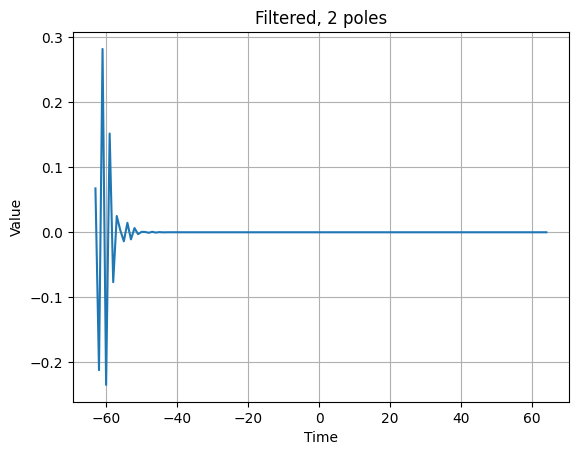

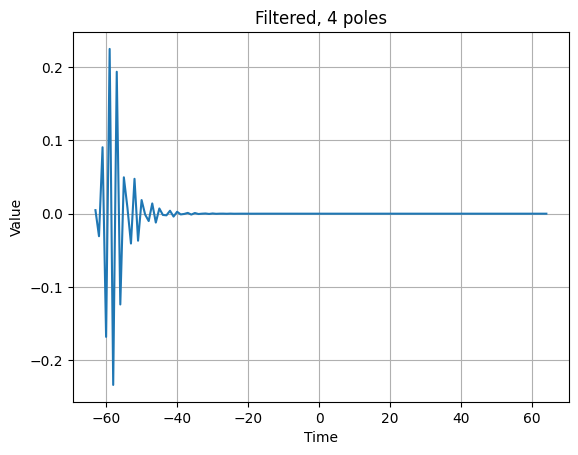

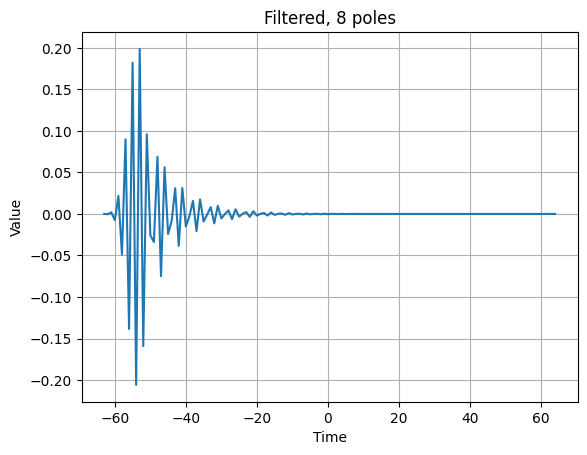

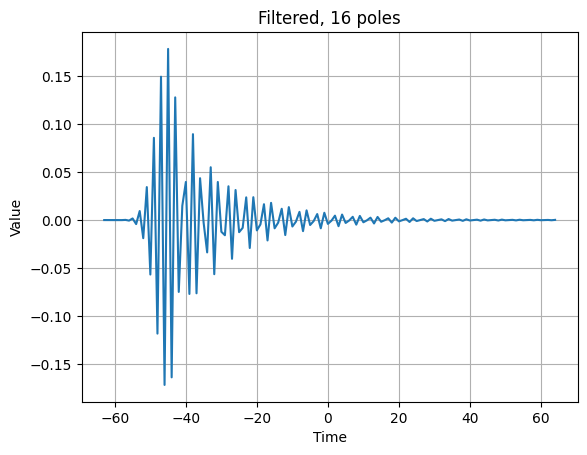

In [182]:
# (d)

fc = 0.8
poles = np.array([2, 4, 8, 16])
butters = np.zeros(4, np.ndarray)

i = 0
for n_poles in poles:
    butters[i] = butter(poles[i], fc, 'highpass', analog=False)
    i += 1

i = 0
for butterworth in butters:
    fig, ax1 = plt.subplots()
    a = butterworth[0]
    b = butterworth[1]
    filtered = lfilter(a, b, delta)
    ax1.plot(t, filtered)
    ax1.set_title(f"Filtered, {poles[i]} poles")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Value")
    ax1.grid(True)
    i += 1

### COMMENT: 

Filtering with the high pass filter results in a periodic function that starts very small, peaks quickly, then decreases back to zero. Adding more poles resulted in a longer delay before the spikes began, lower peak magnitudes, and a longer time to reduce to zero.

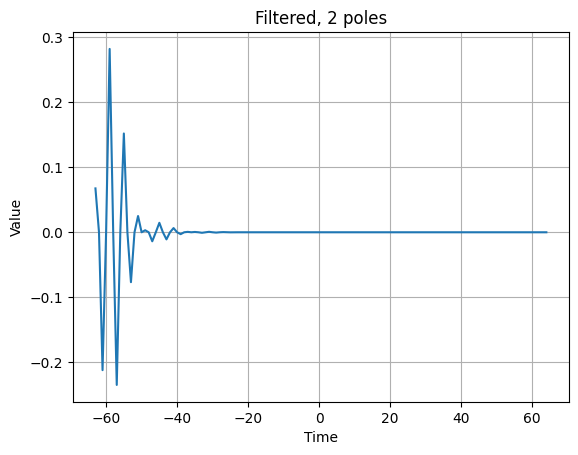

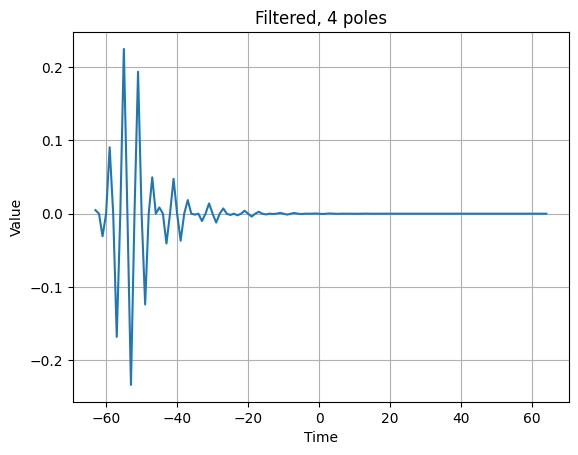

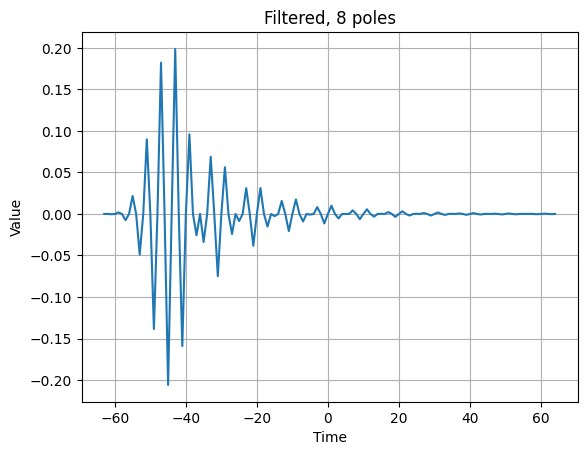

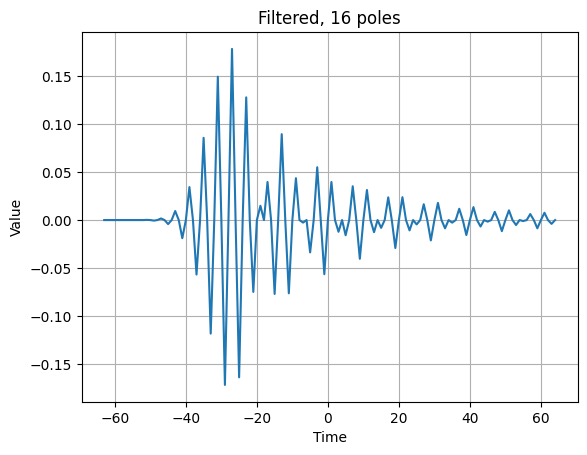

In [181]:
# (d)

fc = [0.4, 0.6]
poles = np.array([2, 4, 8, 16])
butters = np.zeros(4, np.ndarray)

i = 0
for n_poles in poles:
    butters[i] = butter(poles[i], fc, 'bandpass', analog=False)
    i += 1

i = 0
for butterworth in butters:
    fig, ax1 = plt.subplots()
    a = butterworth[0]
    b = butterworth[1]
    filtered = lfilter(a, b, delta)
    ax1.plot(t, filtered)
    ax1.set_title(f"Filtered, {poles[i]} poles")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Value")
    ax1.grid(True)
    i += 1

### COMMENT:

The band pass filter produced similar results to the high pass filter, but more extreme. With 16 poles, the delay at the start of the time series is about twice as long as with the high pass, and the function took significantly longer to decrease to near zero.

Using filtfilt, none of the filtered delta functions have a delay at the start of the time series. Aside from that, the results are nearly identical to the results from part (a).


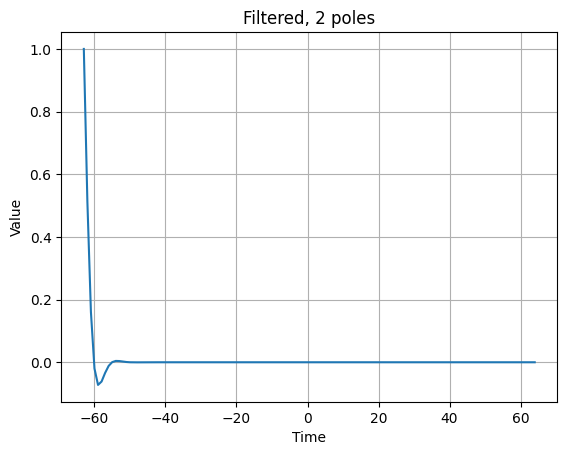

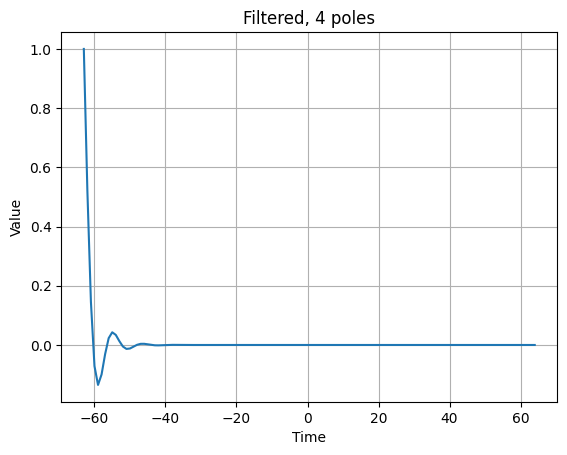

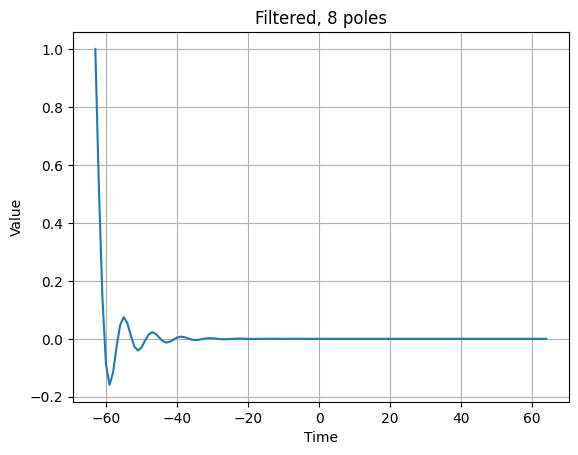

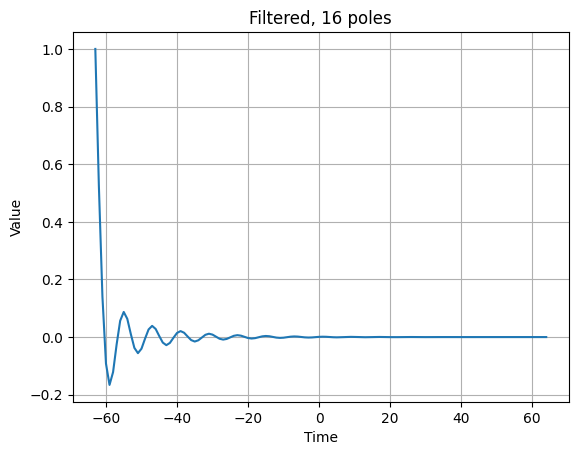

In [89]:
# (f)

t = np.arange(-63, 65)
delta = unit_impulse(128, 0)

fnyquist = 1 / 2
fc = 0.5 * fnyquist
poles = np.array([2, 4, 8, 16])
butters = np.zeros(4, np.ndarray)

i = 0
for n_poles in poles:
    butters[i] = butter(poles[i], fc, 'lowpass', analog=False)
    i += 1

i = 0
for butterworth in butters:
    fig, ax1 = plt.subplots(1)
    a = butterworth[0]
    b = butterworth[1]
    filtered = filtfilt(a, b, delta)
    ax1.plot(t, filtered)
    ax1.set_title(f"Filtered, {poles[i]} poles")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Value")
    ax1.grid(True)
    i += 1

### COMMENT:

Using filtfilt, none of the filtered delta functions have a delay at the start of the time series. Aside from that, the results are nearly identical to the results from part (a).

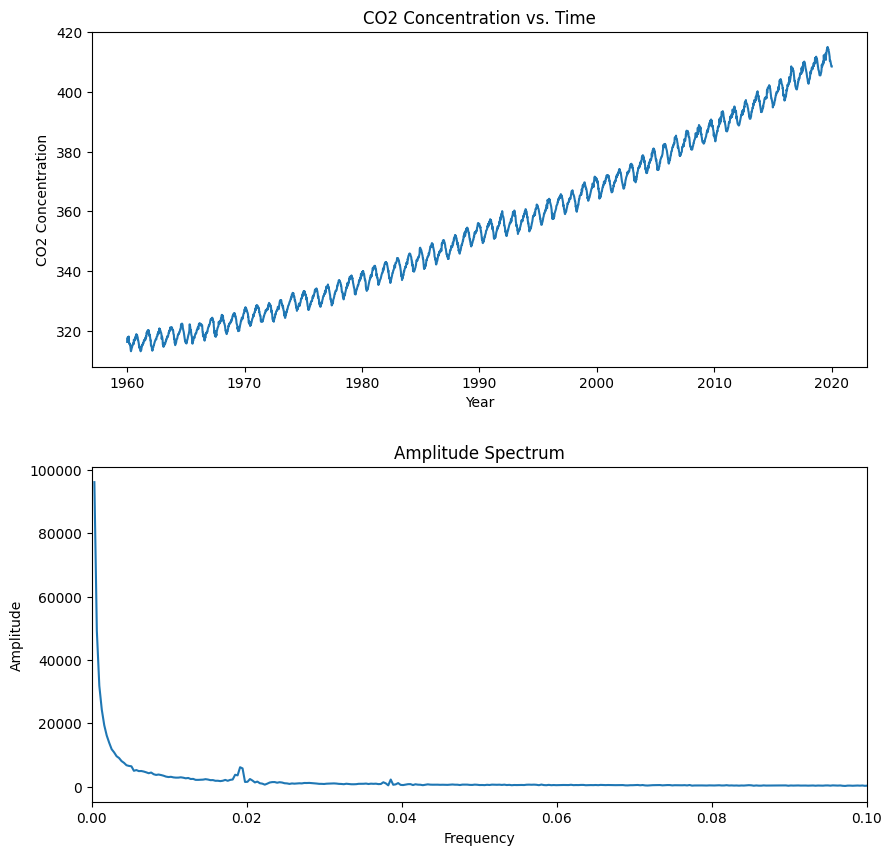

In [195]:
# 2. (a)

data = pd.read_csv("data/maunaloa_weekly.csv")
fft_data = fft(data["CO2 Concentration"].values)
freq = fftfreq(len(data), 1)
i = np.where(freq > 0)

df = data.copy()
df.Date = df.Date.apply(lambda x: np.round(int(x.split('-')[0]), -1))
ticks = np.unique(df.Date)
r = np.linspace(ticks[0], ticks[-1], len(data))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
ax1.plot(np.linspace(ticks[0], ticks[-1], len(data)), data["CO2 Concentration"])
# ax1.set_xticks(ticks)
ax1.set_title("CO2 Concentration vs. Time")
ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 Concentration")

ax2.plot(freq[i], 2 * abs(fft_data)[i])
ax2.set_title("Amplitude Spectrum")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Amplitude")
ax2.set_xlim([0, 0.1])
plt.subplots_adjust(hspace=0.3)

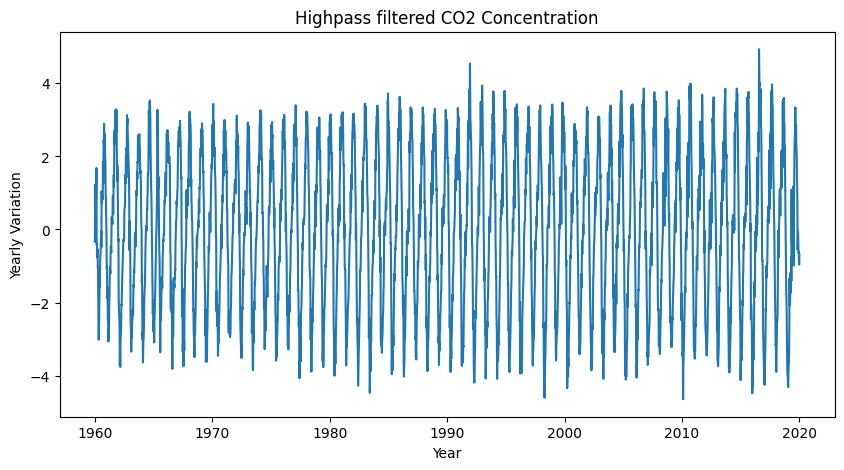

In [171]:
# (b)

poles = 4
fc = 0.015
a, b = butter(poles, fc, 'highpass', analog=False)
filtered_co2 = filtfilt(a, b, data["CO2 Concentration"])

plt.subplots(figsize=(10, 5))
plt.plot(r, filtered_co2)
plt.xticks(ticks);
plt.title("Highpass filtered CO2 Concentration")
plt.xlabel("Year")
plt.ylabel("Yearly Variation");

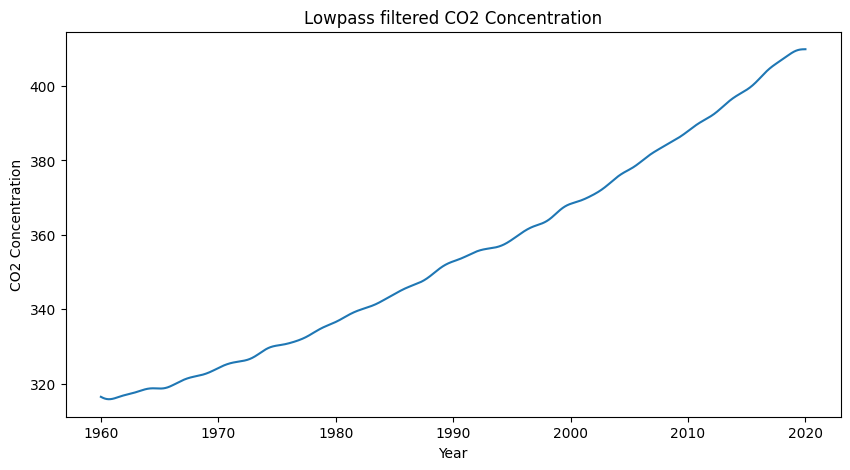

In [180]:
# (c)

poles = 4
fc = 0.015
a, b = butter(poles, fc, 'lowpass', analog=False)
filtered_co2 = filtfilt(a, b, data["CO2 Concentration"])

plt.subplots(figsize=(10, 5))
plt.plot(r, filtered_co2)
plt.xticks(ticks);
plt.title("Lowpass filtered CO2 Concentration")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration");